In [ ]:
#Import a bunch of stuff

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense
from keras.optimizers import Adam, SGD

from tensorflow.keras.datasets import mnist
import tensorflow as tf

In [ ]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

In [ ]:
print("X_train", X_train.shape) #60,000 for training
print("X_train", X_test.shape) #10,000 for testing

X_train (60000, 28, 28)
X_train (10000, 28, 28)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Counts')

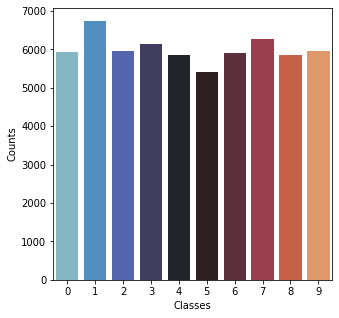

In [ ]:
#Look at the label counts to make sure the data isn't unbalanced

plt.figure(figsize=(5,5))
g = sns.countplot(y_train, palette="icefire")
plt.xlabel("Classes")
plt.ylabel("Counts")

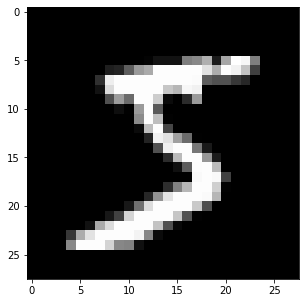

In [ ]:
img = X_train[0]
plt.figure(figsize=(5,5))
plt.imshow(img,cmap = "gray")

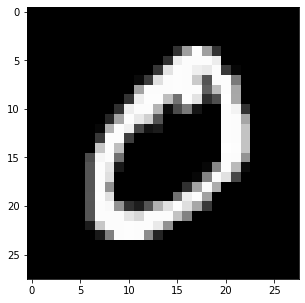

In [ ]:
img2 = X_train[1]
plt.figure(figsize=(5,5))
plt.imshow(img2,cmap = "gray")

In [ ]:
X_train = X_train/255.0 #normalize to ensure that no single feature is influencing the data. Otherwise, model may get thrown by certain features. 
#It will take longer for the model to converge to produce conclusions if you do not normalize
X_test = X_test/255.0 #divide by maxmium number of units in grayscale


In [ ]:
y_train[0] #try one-hot encoding. We do not want to keep the numbers as the way they are
#If my features (red,blue,green)
#red - 0, blue - 1, green - 2. This is a problem because ML might weigh green more than red b/c 2>0
#For one-hot encoding
# red - 1,0,0,0
#blue - 0,1,0,0
#green - 0,0,1,0


5

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [ ]:
y_train[0] #this is the number five now

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#Reshape.4d input(Batch_size, height, width, channels)
X_train.shape #missing a channel dimension in the current data set
#so...
X_train = X_train.reshape(-1, 28,28,1) #same height, width and channel. The -1 tells python to 'give us everything in the batch_size'
#This is helpful when you don't know the batch_size of a given set
X_test = X_test.reshape(-1,28,28,1)

In [ ]:
#4x4 = 16 pixels. can be reshaped into 2 x 8 or 8 x 2 #this is usef

In [ ]:
#Start  Building our architecture (conv - poolin - conv - pooling - flatten - dense - dense) layers

model = Sequential()
model.add(Conv2D(filters=20, kernel_size=(3,3),activation='relu', input_shape=(28,28,1))) #This is for the first conv layer
model.add(MaxPool2D(pool_size=(2,2))) #This is a pooling layer
model.add(Conv2D(filters=10,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=64,activation='relu')) #chose 64 arbitrarily
model.add(Dropout(rate=0.2))#There is a 20% chance that our model will not use a particular neuron. Rather, each neuron has 20% chance of beeing dropped
#This is to reduce overfitting. Dropout rates are generally between 0.2 and 0.5. Avoid using dropouts after Conv layer. We don't want penalize before our 
#layers are fully connected
model.add(Dense(units=10, activation='softmax')) #sigmoid activation

In [ ]:
model.summary() #always good to check after run

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 20)        200       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 10)        1810      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                16064     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

In [ ]:
#Optimizer. This will optimize your loss function and improve the learning rate

#optimizer = Adam(learning_rate=0.01)
optimizer = SGD(learning_rate=0.01,momentum=0.99) # too small, it will take a while to reach the minimum convergence; too big you may always overstep
#try learning rate = 0.001, and 0.1, keep everything the same

In [ ]:
#compile the model
model.compile(optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 64 #try powers of two to improve the RAM/memory in the CPU
EPOCHS = 10 # One epoch is running throuhg all 60000 features once. This looks at the image 10 times


In [ ]:
history = model.fit(X_train,y_train,batch_size=BATCH_SIZE, epochs=EPOCHS,validation_data=(X_test,y_test))

Epoch 1/10
938/938 [==============================] - 52s 35ms/step - loss: 0.6991 - accuracy: 0.7722 - val_loss: 0.1428 - val_accuracy: 0.9562
Epoch 2/10
938/938 [==============================] - 33s 35ms/step - loss: 0.2032 - accuracy: 0.9434 - val_loss: 0.1615 - val_accuracy: 0.9666
Epoch 3/10
938/938 [==============================] - 33s 35ms/step - loss: 0.2203 - accuracy: 0.9439 - val_loss: 0.1324 - val_accuracy: 0.9641
Epoch 4/10
938/938 [==============================] - 33s 36ms/step - loss: 0.1682 - accuracy: 0.9542 - val_loss: 0.1300 - val_accuracy: 0.9652
Epoch 5/10
938/938 [==============================] - 34s 36ms/step - loss: 0.1566 - accuracy: 0.9583 - val_loss: 0.1521 - val_accuracy: 0.9553
Epoch 6/10
938/938 [==============================] - 34s 36ms/step - loss: 0.1563 - accuracy: 0.9575 - val_loss: 0.1267 - val_accuracy: 0.9706
Epoch 7/10
938/938 [==============================] - 35s 37ms/step - loss: 0.1372 - accuracy: 0.9642 - val_loss: 0.1221 - val_accuracy:

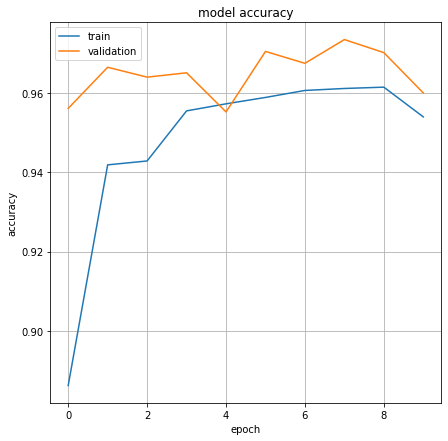

In [ ]:
fig = plt.figure(figsize=(7,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

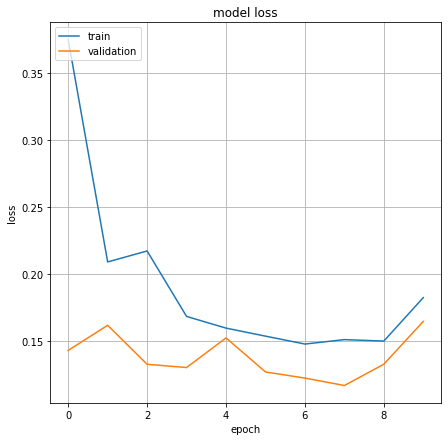

In [ ]:
fig = plt.figure(figsize=(7,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.grid()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

Text(69.0, 0.5, 'Ground Truth')

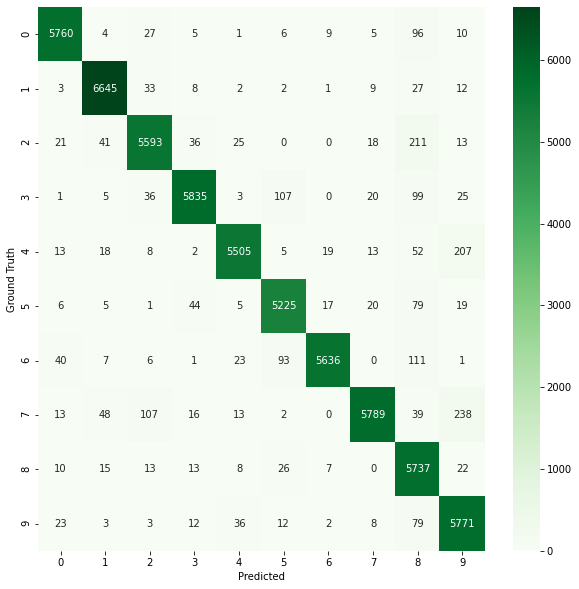

In [ ]:
#Plot confusion_matrices for classification tasks to see how many accurate predictions the model made

y_pred_train = model.predict(X_train)
y_pred_train = np.argmax(y_pred_train, axis=1)

y_true = np.argmax(y_train, axis=1)

cm = confusion_matrix(y_true=y_true, y_pred=y_pred_train)

fig = plt.figure(figsize=(10,10))
sns.heatmap(cm,cmap = 'Greens', annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Ground Truth")